### Types of Graphs for our lab report

- [X] plan histgrams graphs for data collection section of paper 
- [X] Plan historams of data from day 1 of the lab
- [ ] Combined lead thickness experiment for 40ms wait time - histograms
- [ ] Combined lead thickness experiment for 80ms wait time - histograms
- asdfasasdd

In [1]:
# look at foo3 and foo4

import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import csv
from scipy.stats import norm
import seaborn as sns



def lvm_to_csv(lvm_filename, csv_filename):
    # Open the LVM file for reading
    with open(lvm_filename, 'r') as lvm_file:
        # Read the entire file into memory
        lines = lvm_file.readlines()

    data_lines = lines

    # Open the CSV file for writing
    with open(csv_filename, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        
        colums = "Time	Col1	Col2	Scale"
        writer.writerow( colums.strip().split() )
        
        
        # Write data to CSV file
        for line in data_lines:
            # Split the line into values based on whitespace or specific delimiter
            values = line.strip().split()
            writer.writerow(values)

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


## load data files

In [2]:

# Convert an example LVM file to CSV
# lvm_to_csv('./data/30Jan2024_No Cobalt_RunTime_300s_WaitTime_80s.lvm', './data_csv/30Jan2024_No Cobalt_RunTime_300s_WaitTime_80s.csv')
lvm_to_csv('./data/26Jan2024_RunT_240000s_WaitT_1000ms_Experiment1.lvm', './data_csv/26Jan2024_RunT_240000s_WaitT_1000ms_Experiment1.csv')

# data = pd.read_csv("./data_csv/30Jan2024_No Cobalt_RunTime_300s_WaitTime_80s.csv")
data = pd.read_csv("./data_csv/26Jan2024_RunT_240000s_WaitT_1000ms_Experiment1.csv")




# convert data for foo3


lvm_to_csv("./data/30Jan2024_No Cobalt_RunTime_300s_WaitTime_80s.lvm", './data_csv/30Jan2024_No Cobalt_RunTime_300s_WaitTime_80s.csv')
lvm_to_csv("./data/30Jan2024_1.530mm_RunTime_300s_WaitTime_80ms.lvm", './data_csv/30Jan2024_1.530mm_RunTime_300s_WaitTime_80ms.csv')
lvm_to_csv("./data/30Jan2024_3.060mm_RunTime_300s_WaitTime_80ms.lvm", './data_csv/30Jan2024_3.060mm_RunTime_300s_WaitTime_80ms.csv')
lvm_to_csv("./data/30Jan2024_5.860mm_RunTime_300s_WaitTime_80ms.lvm", './data_csv/30Jan2024_5.860mm_RunTime_300s_WaitTime_80ms.csv')
lvm_to_csv("./data/30Jan2024_8.670mm_RunTime_300s_WaitTime_80ms.lvm", './data_csv/30Jan2024_8.670mm_RunTime_300s_WaitTime_80ms.csv')
lvm_to_csv("./data/30Jan2024_14.500mm_RunTime_300s_WaitTime_80ms.lvm", './data_csv/30Jan2024_14.500mm_RunTime_300s_WaitTime_80ms.csv')
lvm_to_csv("./data/30Jan2024_20.300mm_RunTime_300s_WaitTime_80ms.lvm", './data_csv/30Jan2024_20.300mm_RunTime_300s_WaitTime_80ms.csv')
lvm_to_csv("./data/30Jan2024_29.000mm_RunTime_300s_WaitTime_80ms.lvm", './data_csv/30Jan2024_29.000mm_RunTime_300s_WaitTime_80ms.csv')



In [3]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239999 entries, 0 to 239998
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    239999 non-null  float64
 1   Col1    239999 non-null  float64
 2   Col2    239999 non-null  float64
 3   Scale   239999 non-null  float64
dtypes: float64(4)
memory usage: 7.3 MB


,Time,Col1,Col2,Scale
0,1.0,158.0,185.0,0.100004
1,2.0,172.0,200.0,0.100007
2,3.0,144.0,196.0,0.100011
3,4.0,141.0,211.0,0.100015
4,5.0,148.0,229.0,0.100019


In [6]:
# Set the aesthetics for the plots
sns.set_style("whitegrid")

MinCountRange = min(data['Col1'].min(), data['Col2'].min())
MaxCountRange = max(data['Col2'].max(), data['Col2'].max())

# Creating histograms for Col1 and Col2
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Col1
sns.histplot(data['Col1'], bins=np.arange( MinCountRange , MaxCountRange + 1, 1), binrange=(0,MaxCountRange), kde=True, ax=ax[0], color='skyblue')
ax[0].set_title('Histogram of Col1')
ax[0].set_xlabel('Col1')
ax[0].set_ylabel('Counts')

# Plot for Col2
sns.histplot(data['Col2'], bins=np.arange( MinCountRange , MaxCountRange + 1, 1), binrange=(0,MaxCountRange) ,kde=True, ax=ax[1], color='lightgreen')
ax[1].set_title('Histogram of Col2')
ax[1].set_xlabel('Col2')
ax[1].set_ylabel('Counts')

plt.tight_layout()
plt.show()
plt.savefig(")

SyntaxError: unterminated string literal (detected at line 24) (2552038617.py, line 24)

In [ ]:
# Compute basic statistics for Col1 and Col2
stats_col1 = data['Col1'].describe()
stats_col2 = data['Col2'].describe()

# Display the statistics
stats_col1, stats_col2

(count    239999.000000
 mean        154.749257
 std          12.408494
 min         104.000000
 25%         146.000000
 50%         155.000000
 75%         163.000000
 max         213.000000
 Name: Col1, dtype: float64,
 count    239999.000000
 mean        205.537431
 std          14.415509
 min         140.000000
 25%         196.000000
 50%         205.000000
 75%         215.000000
 max         272.000000
 Name: Col2, dtype: float64)

# --------------------------------------------------------------------

In [ ]:

# plotting histograms 

plt.hist(data['Col2'], label='Column 2', bins=np.arange( MinCountRange , MaxCountRange + 1, 1), align='right' ,density=True) 

plt.hist(data['Col1'], label='Column 1', bins=np.arange( MinCountRange , MaxCountRange + 1, 1), align='right' , density=True) 
  
plt.legend(loc='upper right') 
plt.xlabel('Counts') 
plt.ylabel('Density') 

plt.title('Histogram Stack of Column 1 & 2') 

#Fit
mu1, sigma1 = norm.fit(data['Col1'])
mu2, sigma2 = norm.fit(data['Col2'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p1 = norm.pdf(x,mu1,sigma1)
p2 = norm.pdf(x,mu2,sigma2)
plt.plot(x,p1,'k',linewidth=1)
plt.plot(x,p2,'k',linewidth=1)
plt.show()


fig, axs = plt.subplots(2,figsize=(5, 4))

axs[0].hist(data['Col1'], bins=np.arange( MinCountRange , MaxCountRange + 1, 1), align='right' ,density=True)

# Set titles, labels, etc.
axs[0].set_title('Histogram of Col1')
axs[0].set_xlabel('Col1 values')
axs[0].set_ylabel('Density')

axs[1].hist(data['Col2'], bins=np.arange( MinCountRange , MaxCountRange + 1, 1), align='right' ,density=True, color='red')


axs[0].set_xlabel('Col1 values')
axs[0].set_ylabel('Density')

axs[1].set_xlabel('Col2 values')
axs[1].set_ylabel('Density')


plt.show()


NameError: name 'plt' is not defined

/Users/apple/miniconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


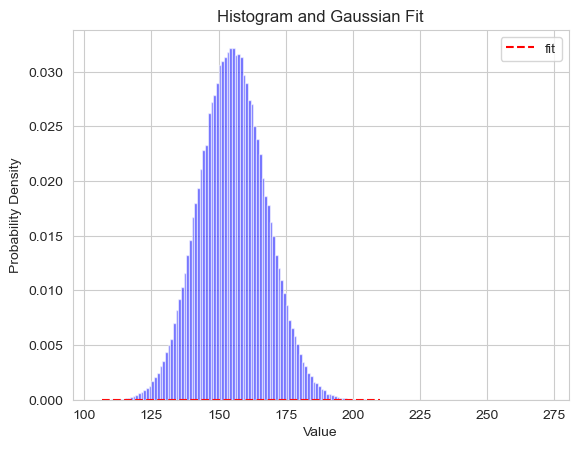

Fitted mean: 0.0, Fitted SD: 12.408468004952802, SDM: 0.025328732019734287


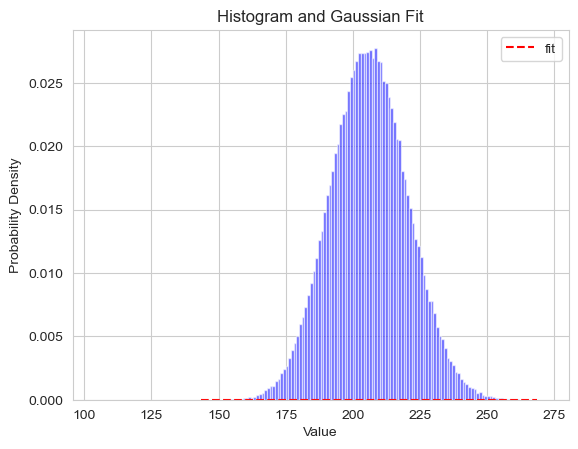

Fitted mean: 0.0, Fitted SD: 14.415479135723558, SDM: 0.029425534870144644


In [ ]:
# Define the Gaussian function
def gaussian(x, mean, amplitude, standard_deviation):
    return amplitude * np.exp(-((x - mean) ** 2 / (2 * standard_deviation ** 2)))

# Histogram data for column 1
hist_data = data['Col1']
counts, bin_edges = np.histogram(hist_data, bins=20)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Fit the Gaussian function to the histogram data
popt, pcov = curve_fit(gaussian, bin_centers, counts, p0=[0, max(counts), np.std(hist_data)])

# Extract the SDM from the fit parameters
sdm = popt[2] / np.sqrt(len(hist_data))

# Plot the histogram and the fitted Gaussian
plt.hist(hist_data, bins=np.arange( MinCountRange , MaxCountRange + 1, 1), density=True, alpha=0.6, color='b')
plt.plot(bin_centers, gaussian(bin_centers, *popt), 'r--', label='fit')
plt.title('Histogram and Gaussian Fit')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

print(f"Fitted mean: {popt[0]}, Fitted SD: {popt[2]}, SDM: {sdm}")

# ----------------------------------------------------------------------------

# Histogram data for column 2
hist_data = data['Col2']
counts, bin_edges = np.histogram(hist_data, bins=20)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Fit the Gaussian function to the histogram data
popt, pcov = curve_fit(gaussian, bin_centers, counts, p0=[0, max(counts), np.std(hist_data)])

# Extract the SDM from the fit parameters
sdm = popt[2] / np.sqrt(len(hist_data))

# Plot the histogram and the fitted Gaussian
plt.hist(hist_data, bins=np.arange( MinCountRange , MaxCountRange + 1, 1), density=True, alpha=0.6, color='b')
plt.plot(bin_centers, gaussian(bin_centers, *popt), 'r--', label='fit')
plt.title('Histogram and Gaussian Fit')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

print(f"Fitted mean: {popt[0]}, Fitted SD: {popt[2]}, SDM: {sdm}")

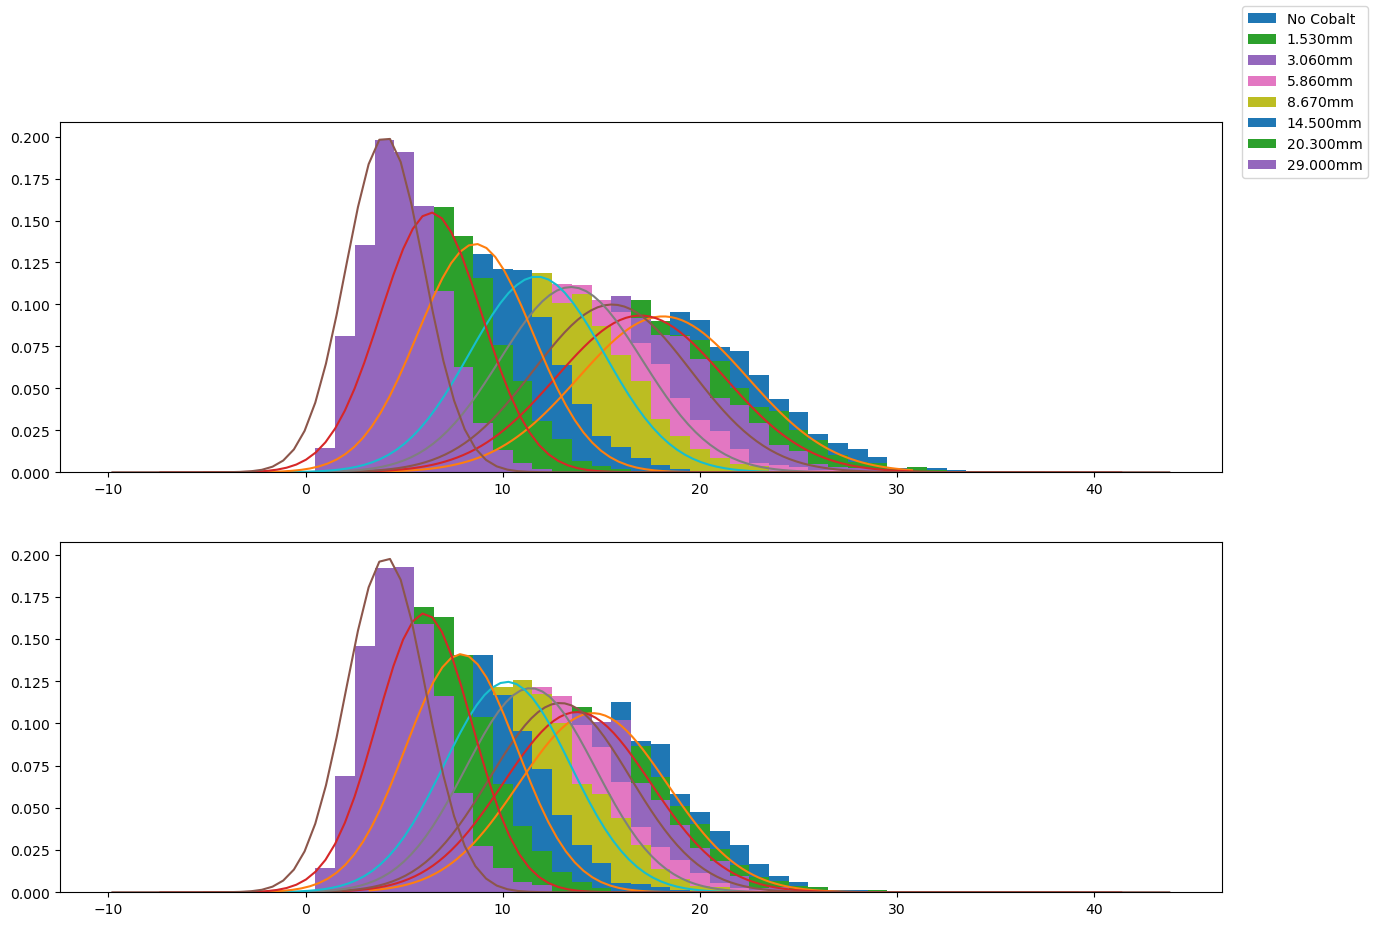

In [7]:
def histrograms():
    """
    Shows lead data
    """
    datas = [
        pd.read_csv("./data_csv/30Jan2024_No Cobalt_RunTime_300s_WaitTime_80s.csv"),
        pd.read_csv("./data_csv/30Jan2024_1.530mm_RunTime_300s_WaitTime_80ms.csv"),
        pd.read_csv("./data_csv/30Jan2024_3.060mm_RunTime_300s_WaitTime_80ms.csv"),
        pd.read_csv("./data_csv/30Jan2024_5.860mm_RunTime_300s_WaitTime_80ms.csv"),
        pd.read_csv("./data_csv/30Jan2024_8.670mm_RunTime_300s_WaitTime_80ms.csv"),
        pd.read_csv("./data_csv/30Jan2024_14.500mm_RunTime_300s_WaitTime_80ms.csv"),
        pd.read_csv("./data_csv/30Jan2024_20.300mm_RunTime_300s_WaitTime_80ms.csv"),
        pd.read_csv("./data_csv/30Jan2024_29.000mm_RunTime_300s_WaitTime_80ms.csv")
    ]

    legend_Label = [
        "No Cobalt",
        "1.530mm",
        "3.060mm",
        "5.860mm",
        "8.670mm",
        "14.500mm",
        "20.300mm",
        "29.000mm"
    ]

    # Set the figure size larger with the 'figsize' argument
    fig, axs = plt.subplots(2, figsize=(15, 10))  # This sets the figure size to 15x10 inches
    for i in range(len(datas)):
        # Histogram
        axs[0].hist(datas[i]['Col1'],bins=np.arange( min(datas[i]['Col1']), max(datas[i]['Col1']) + 1, 1), align='right',density=True, label=legend_Label[i])
        axs[1].hist(datas[i]['Col2'],bins=np.arange( min(datas[i]['Col2']), max(datas[i]['Col2']) + 1, 1), align='right',density=True)
        
        # Fit
        mu1, sigma1 = norm.fit(datas[i]['Col1'])
        mu2, sigma2 = norm.fit(datas[i]['Col2'])
        
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin,xmax,100)
        
        p1 = norm.pdf(x,mu1,sigma1)
        p2 = norm.pdf(x,mu2,sigma2)
        
        axs[0].plot(x,p1)
        axs[1].plot(x,p2)
        # axs[0].errorbar(x,p1,yerr=0.01,xerr=0.1)

    fig.legend()
    plt.show()

histrograms()